## Data Description
The COVID-19 pandemic dataset in Indonesia, time series. This dataset is a compilation of various open data sources, including: covid19.go.id (pandemic data), kemendagri.go.id (demographic data), bps.go.id (demographic data), as well as some calculations of the relationship of the data.

This dataset contains a time series of COVID-19 pandemic events in Indonesia, at the country level to province level. If possible, in the future I will provide it to the city/regency level.

## Objective
Mencari central tendency dan variance dari fitur-fitur kolom data set.

## Working Area

Import library yang diperlukan

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Load data menjadi DataFrame

In [257]:
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


Melihat statistik data pada tiap kolom fitur.

In [258]:
data.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,21759.000000,21759.000000,21759.000000,21759.000000,2.175900e+04,21759.000000,2.175900e+04,21759.000000,0.0,21759.000000,...,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,20572.000000,19292.000000
mean,391.293580,13.220415,377.310998,0.762167,8.525997e+04,2648.289352,7.671260e+04,5899.079002,NaN,24.160256,...,744.989784,113.680803,-2.731868,29.393033,6183.650588,0.852727,163.542156,16.354192,1.395671,1.074145
std,2074.551043,76.482617,1999.062563,937.213509,3.685133e+05,11776.011067,3.403957e+05,27518.102431,NaN,68.708265,...,2743.209719,9.857587,3.608264,69.941090,10288.123342,2.277310,254.195761,25.419595,3.080207,1.578502
min,0.000000,0.000000,0.000000,-25725.000000,1.000000e+00,0.000000,0.000000e+00,-2306.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,4.000000,-16.000000,1.822500e+03,50.000000,1.038500e+03,182.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,1.750000,415.915000,0.000000,10.880000,1.090000,0.650000,0.660000
50%,41.000000,1.000000,31.000000,0.000000,1.078000e+04,283.000000,8.745000e+03,919.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,8.160000,2727.460000,0.180000,73.550000,7.350000,0.990000,1.000000
75%,151.000000,5.000000,143.000000,27.000000,3.646450e+04,1050.000000,3.293250e+04,2607.500000,NaN,18.000000,...,262.700000,121.201093,0.212037,26.260000,7374.120000,0.750000,195.850000,19.585000,1.330000,1.000000
max,56757.000000,2069.000000,48832.000000,36726.000000,4.257243e+06,143858.000000,4.105680e+06,574135.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1348.130000,79663.790000,63.800000,1533.980000,153.400000,175.000000,134.500000


Cek tipe fitur kolom beserta jumlah null.

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [260]:
for fitur in data.columns:
    total_null = sum(data[fitur].isnull())
    if total_null > 0:    
        print(f'Kolom {fitur} memiliki null sejumlah {total_null}')

Kolom City or Regency memiliki null sejumlah 21759
Kolom Province memiliki null sejumlah 642
Kolom Island memiliki null sejumlah 642
Kolom Time Zone memiliki null sejumlah 642
Kolom Special Status memiliki null sejumlah 18636
Kolom Total Cities memiliki null sejumlah 614
Kolom Total Urban Villages memiliki null sejumlah 617
Kolom Total Rural Villages memiliki null sejumlah 642
Kolom Growth Factor of New Cases memiliki null sejumlah 1187
Kolom Growth Factor of New Deaths memiliki null sejumlah 2467


Apabila kita perhatikan kolom fitur 'City or Regency' merupakan missing value untuk semua barisnya. Oleh karena itu kita remove kolom tersebut, sedangkan kolom lainnya meskipun memiliki null atau missing value hal tersebut tidak mempengaruhi perhitungan Central Tendency dan Variance. Kita juga akan remove kolom 'Date' dan 'Time Zone'.

In [261]:
del data['City or Regency']
del data['Date']
del data['Time Zone']

Kita coba melihat distribusi dari masing-masing kolom fitur numerik sebagai berikut:

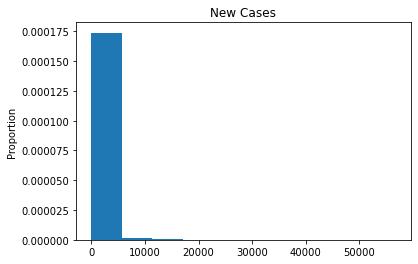

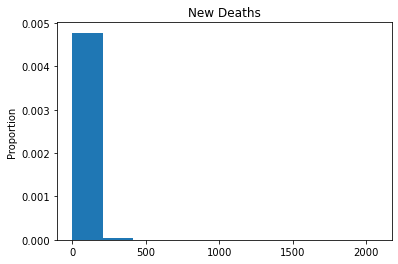

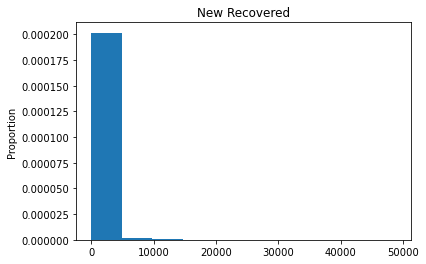

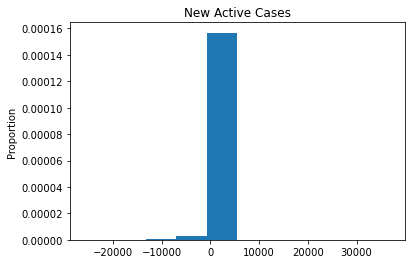

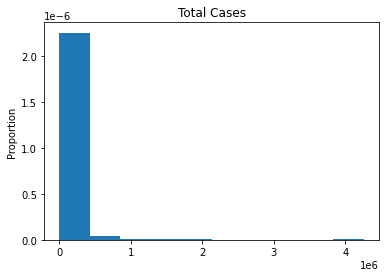

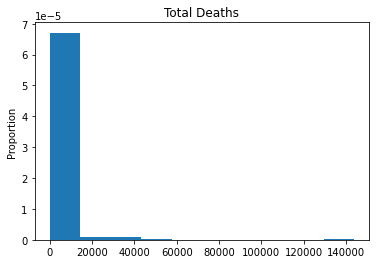

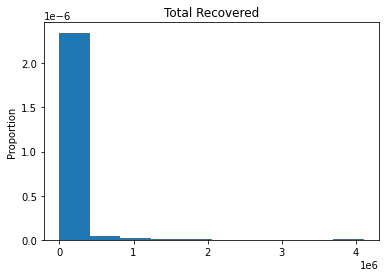

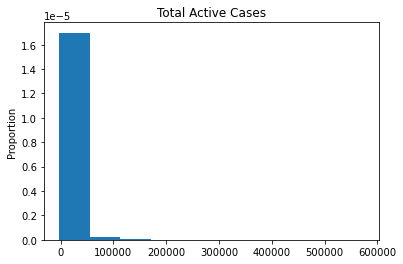

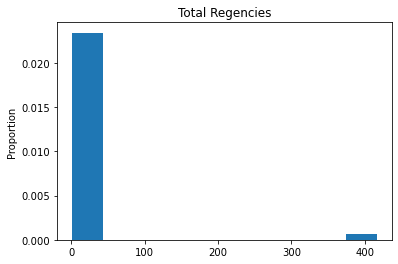

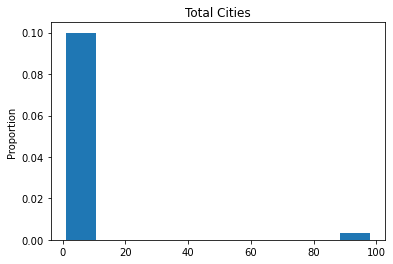

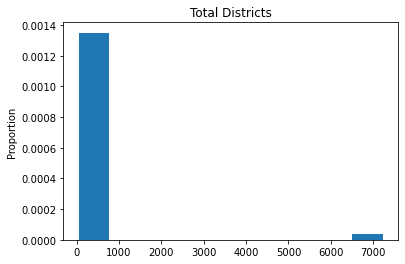

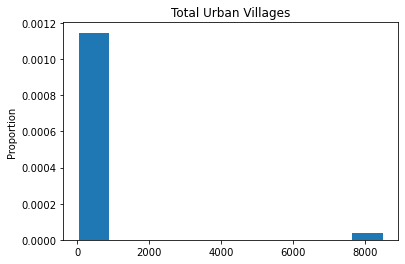

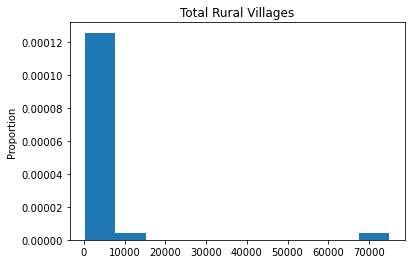

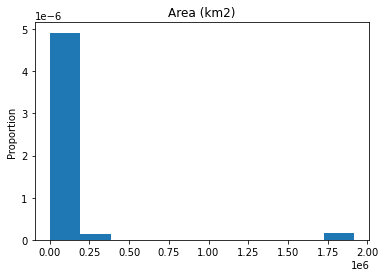

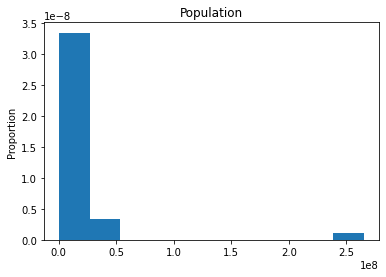

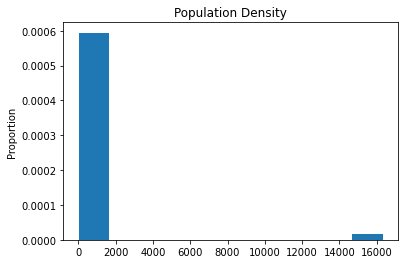

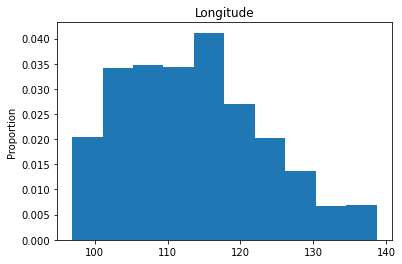

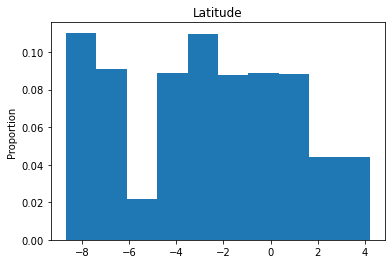

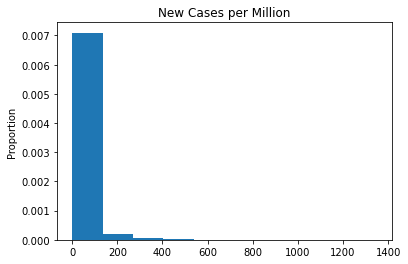

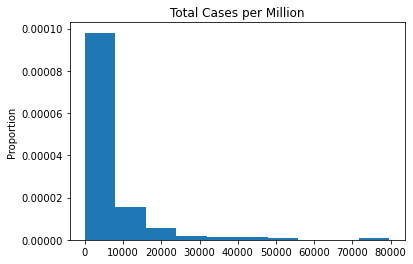

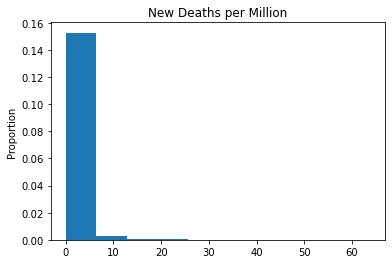

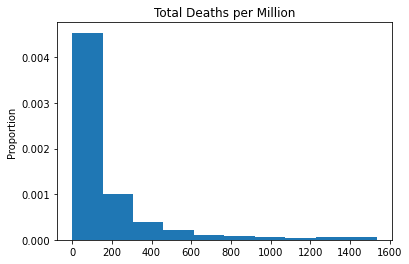

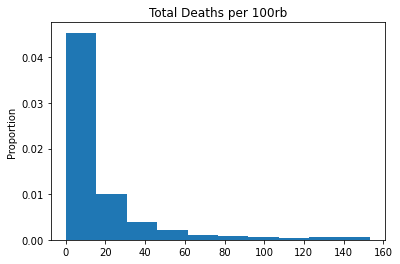

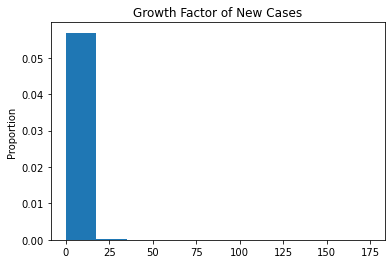

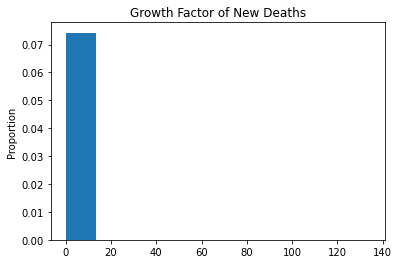

In [262]:
for fitur in data.describe().columns:
    plt.hist(data[fitur],density=True)
    plt.title(fitur)
    plt.ylabel('Proportion')
    plt.show()

kebanyakan kolom fitur memiliki outlier dengan positive skew, sedangkan kolom fitur longitude dan latitude tidak.
Misal pada contoh fitur kolom 'New Deaths per Million':

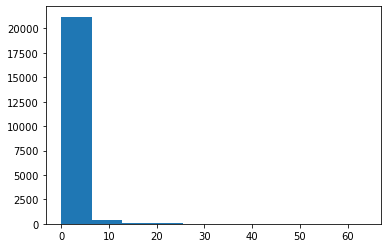

In [263]:
plt.hist(data['New Deaths per Million'])
plt.show()

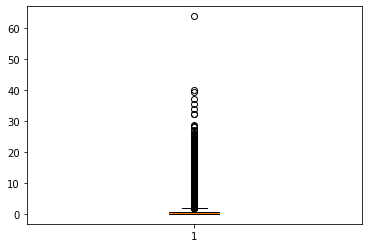

In [264]:
plt.boxplot(data['New Deaths per Million'])
plt.show()

Terdapat banyak outlier pada kolom 'New Deaths per Million'

Untuk data yang positive skew tersebut kita akan gunakan **median** sebagai central tendency.

Untuk data fitur kolom longitude dan latitude kita bisa gunakan **mean** sebagai central tendency.

Untuk data fitur kolom non numerik kita gunakan **mode** sebagai central tendency.

Kita coba kelompokkan fitur kolom berdasarkan central tendency yang akan dicari.

In [265]:
feature = data.columns.tolist()
feature_object = []
for fitur in feature:
    if data[fitur].dtype == 'object':
        feature_object.append(fitur)
feature_nonskew = ['Longitude','Latitude']
feature_skew = [i for i in feature if (i not in feature_nonskew) & (i not in feature_object)]


In [266]:
median_ = pd.DataFrame(data[feature_skew].median()).T

In [267]:
mean_ = pd.DataFrame(data[feature_nonskew].mean()).T

In [268]:
mode_ = pd.DataFrame(data[feature_object].dropna().mode())

Kita jadikan semua central tendency tersebut ke dalam satu DataFrame

In [269]:
cent_tend = mean_.join([median_,mode_])
cent_tend

,Longitude,Latitude,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Location ISO Code,Location,Location Level,Province,Country,Continent,Island,Special Status,Case Fatality Rate,Case Recovered Rate
0,113.680803,-2.731868,41.0,1.0,31.0,0.0,10780.0,283.0,8745.0,919.0,...,ID-JK,DKI Jakarta,Province,DKI Jakarta,Indonesia,Asia,Jawa,Daerah Khusus,1.53%,0.00%


Berikutnya kita akan mencari variance pada firut kolom numerik.

In [270]:
var_ = pd.DataFrame(data.var()).T

C:\Users\ikhbar\AppData\Local\Temp\ipykernel_18324\487070711.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_ = pd.DataFrame(data.var()).T


## Kesimpulan

Nilai central tendency dan variance dapat dilihat pada DataFrame berikut:

In [271]:
cent_var = pd.concat([cent_tend,var_]).set_index(pd.Index(['Central Tendency', 'Variance']))
cent_var

,Longitude,Latitude,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Location ISO Code,Location,Location Level,Province,Country,Continent,Island,Special Status,Case Fatality Rate,Case Recovered Rate
Central Tendency,113.680803,-2.731868,4.100000e+01,1.00000,3.100000e+01,0.000000,1.078000e+04,2.830000e+02,8.745000e+03,9.190000e+02,...,ID-JK,DKI Jakarta,Province,DKI Jakarta,Indonesia,Asia,Jawa,Daerah Khusus,1.53%,0.00%
Variance,97.172021,13.019572,4.303762e+06,5849.59072,3.996251e+06,878369.161606,1.358020e+11,1.386744e+08,1.158692e+11,7.572460e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note: *Terdapat missing value Nan pada baris Variance, dikarenakan kolom-kolom tersebut bukanlah data numerik.*